# Decision Trees
## Predicting a Person's Activity Based on Smartphone Data

In [1]:
import pandas as pd

**Step 1:** Create initial training data table, filtered for 'Mag' and 'Angle' variables, and adding 'subject' and 'activity' columns:

In [2]:
features = [line.strip() for line in open('HAPT_Data_Set/features.txt','r')]
sub_features = [(features.index(s), s) for s in features if ('Mag' in s) or ('Angle' in s)]
sub_features_indices = [i[0] for i in sub_features]
sub_features_names = [i[1] for i in sub_features]

In [3]:
df = pd.read_table('HAPT_Data_Set/Train/X_train.txt', delimiter=' ',
                       usecols=sub_features_indices, names=sub_features_names)
df.head()

,tBodyAccMag-Mean-1,tBodyAccMag-STD-1,tBodyAccMag-Mad-1,tBodyAccMag-Max-1,tBodyAccMag-Min-1,tBodyAccMag-SMA-1,tBodyAccMag-Energy-1,tBodyAccMag-IQR-1,tBodyAccMag-ropy-1,tBodyAccMag-ARCoeff-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,-0.969546,-0.961540,-0.967646,-0.947236,-0.994174,-0.969546,-0.999150,-0.970525,-0.219620,-0.124072,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,-0.984484,-0.981042,-0.983105,-0.979658,-0.996348,-0.984484,-0.999709,-0.986893,-0.426713,0.129618,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,-0.987805,-0.990189,-0.990798,-0.987446,-0.996348,-0.987805,-0.999818,-0.990025,-0.583114,0.086279,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,-0.989940,-0.988966,-0.989351,-0.987446,-0.997687,-0.989940,-0.999849,-0.988460,-0.572296,-0.044082,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,-0.994669,-0.992678,-0.992968,-0.991914,-0.997687,-0.994669,-0.999929,-0.992688,-0.686673,0.228080,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [4]:
subjects = [line.strip() for line in open('HAPT_Data_Set/Train/subject_id_train.txt','r')]
df['subject'] = subjects
activity = [line.strip() for line in open('HAPT_Data_Set/Train/y_train.txt','r')]
df['activity'] = activity

**Step 2:** Create initial test table using same process:

In [5]:
df_test = pd.read_table('HAPT_Data_Set/Test/X_test.txt', delimiter=' ',
                       usecols=sub_features_indices, names=sub_features_names)
subjects_test = [line.strip() for line in open('HAPT_Data_Set/Test/subject_id_test.txt','r')]
df_test['subject'] = subjects_test
activity_test = [line.strip() for line in open('HAPT_Data_Set/Test/y_test.txt','r')]
df_test['activity'] = activity_test

**Step 3:** Plot body acceleration magnitude histograms for the 12 activities to evaluate the ability of this variable to predict static vs dynamic activities:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F33F978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C950128>]], dtype=object)

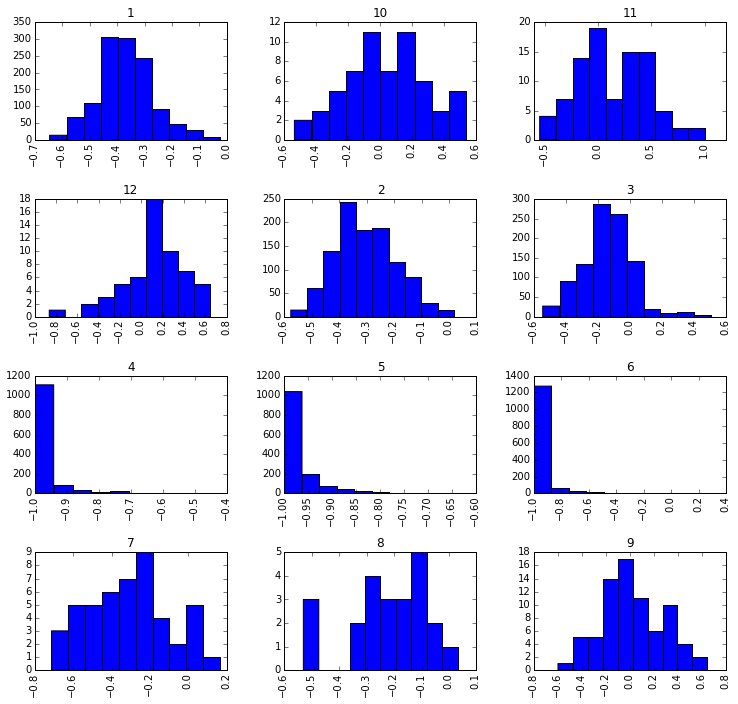

In [6]:
%matplotlib inline
df['tBodyAccMag-Mean-1'].hist(by=df['activity'],figsize=(12,12))

**Step 4:** Split the initial training table into training and validation sets, and fit a random forest classifier to the training set:

In [7]:
from sklearn import cross_validation as cv
from sklearn.ensemble import RandomForestClassifier

In [8]:
X = df[df.columns.tolist()[:-1]]
y = df['activity']

X_train, X_val, y_train, y_val = cv.train_test_split(X, y, train_size=0.8, random_state=0)
clf = RandomForestClassifier(n_estimators=500, oob_score=True)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

**Step 5:** Rank the features by importance scores, and single out the 10th feature's score:
(Metrics between this and the black box model will be compared and summarized in the report's conclusion below.)

In [76]:
importance_scores = clf.feature_importances_.tolist()
important_features = zip(df.columns.tolist()[:-1], importance_scores)
important_features.sort(key=lambda x: x[1], reverse=True)
top_10_features = important_features[:10]
top_10_features

[('tXAxisAcc-AngleWRTGravity-1', 0.1140059401982986),
 ('tYAxisAcc-AngleWRTGravity-1', 0.10358830289570184),
 ('tZAxisAcc-AngleWRTGravity-1', 0.057680529606219146),
 ('tBodyAccJerkMag-Mean-1', 0.0244560638701882),
 ('tBodyAccJerkMag-SMA-1', 0.022128504800968358),
 ('tBodyAccJerkMag-ropy-1', 0.018668803170924925),
 ('tBodyAccJerkMag-Energy-1', 0.01803035996061391),
 ('tBodyAccJerkMag-IQR-1', 0.017471292795020136),
 ('tBodyGyroJerkMag-SMA-1', 0.01688424067123679),
 ('tBodyGyroJerkMag-Mean-1', 0.01572798190383181)]

In [82]:
print 'The 10th most important feature is ' + str(top_10_features[9][0]) +\
       ', which has an importance score of ' + str(top_10_features[9][1]) + '.'

The 10th most important feature is tBodyGyroJerkMag-Mean-1, which has an importance score of 0.0157279819038.


**Step 6:** Identify the model's accuracy score on the validation and test sets, and the precision, recall, and F1 scores on the test set:

In [10]:
from sklearn import metrics


predicted_from_val = clf.predict(X_val)
expected_from_val = y_val

metrics.accuracy_score(expected_from_val, predicted_from_val)

0.94401544401544402

In [11]:
predicted_from_test = clf.predict(df_test[df_test.columns.tolist()[:-1]])
expected_from_test = df_test['activity']

metrics.accuracy_score(expected_from_test, predicted_from_test)

0.87760910815939275

In [12]:
metrics.precision_score(expected_from_test, predicted_from_test, average=None)

array([ 0.83022071,  0.5862069 ,  0.6       ,  0.5625    ,  0.82773109,
        0.96470588,  0.89596603,  0.85714286,  1.        ,  0.58823529,
        0.71428571,  0.60606061])

In [13]:
metrics.recall_score(expected_from_test, predicted_from_test, average=None)

array([ 0.9858871 ,  0.68      ,  0.55102041,  0.33333333,  0.83651805,
        0.78095238,  0.83070866,  0.91726619,  0.99816514,  0.43478261,
        0.5       ,  0.625     ])

In [93]:
metrics.f1_score(expected_from_test, predicted_from_test, average=None)

array([ 0.90138249,  0.62962963,  0.57446809,  0.41860465,  0.83210137,
        0.86315789,  0.86210419,  0.88618593,  0.99908173,  0.5       ,
        0.58823529,  0.61538462])

**Step 6a:** Include the model's oob score and confusion matrix on the test set:

In [19]:
clf.oob_score_

0.93915982617093197

In [41]:
metrics.confusion_matrix(expected_from_test, predicted_from_test)

array([[489,   0,   0,   0,   2,   5,   0,   0,   0,   0,   0,   0],
       [  0,  17,   1,   6,   1,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,  27,   1,   6,   0,   1,   0,   0,   3,   0,   9],
       [  1,  11,   3,   9,   0,   0,   0,   0,   0,   0,   0,   3],
       [ 70,   0,   0,   0, 394,   7,   0,   0,   0,   0,   0,   0],
       [ 27,   0,   0,   0,  65, 328,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 422,  85,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,  45, 510,   0,   1,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0, 544,   0,   0,   0],
       [  0,   0,   3,   0,   6,   0,   2,   0,   0,  10,   2,   0],
       [  0,   0,   1,   0,   0,   0,   1,   0,   0,   2,   5,   1],
       [  0,   1,  10,   0,   1,   0,   0,   0,   0,   0,   0,  20]])

**Step 7:** Create new table for black box analysis, anonymizing the column names:

In [14]:
bb_col_names = ['x'+ str(n) for n in range(len(features))]
black_box_df = pd.read_table('HAPT_Data_Set/Train/X_train.txt', delimiter=' ',
                             names=bb_col_names)
black_box_df['subject'] = [int(a) for a in subjects]
black_box_df['activity'] = [int (b) for b in activity]
black_box_df.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x553,x554,x555,x556,x557,x558,x559,x560,subject,activity
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020,30,2
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252,30,2
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071,30,2
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700,30,2
7766,0.068954,0.001810,-0.080323,-0.269336,-0.366553,-0.147294,-0.377332,-0.360597,-0.255505,0.321881,...,-0.742972,-0.280088,-0.007739,-0.056088,-0.616956,-0.783693,0.246785,0.042981,30,2


**Step 8:** Split the black box table into training, validation, and testing segments, using a 50%/25%/25% split:

In [56]:
bbdf_X_train = black_box_df[black_box_df.subject <=15].iloc[:,:-1]
bbdf_X_val = black_box_df[(black_box_df.subject > 15) & 
                          (black_box_df.subject < 23)].iloc[:,:-1]
bbdf_X_test = black_box_df[black_box_df.subject >=23].iloc[:,:-1]

bbdf_y_train = black_box_df[black_box_df.subject <=15].iloc[:,-1:].ix[:,0]
bbdf_y_val = black_box_df[(black_box_df.subject > 15) & 
                          (black_box_df.subject < 23)].iloc[:,-1:].ix[:,0]
bbdf_y_test = black_box_df[black_box_df.subject >=23].iloc[:,-1:].ix[:,0]

**Step 9:** Fit the training set to the model and determine the oob score:

In [58]:
clf2 = RandomForestClassifier(n_estimators=50, oob_score=True)
clf2.fit(bbdf_X_train, bbdf_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [59]:
clf2.oob_score_

0.95657894736842108

**Step 10:** Rank the black box features by their importance scores, apply original column names, and single out the 10th feature's score for comparison:

In [91]:
bb_importance_scores = clf2.feature_importances_.tolist()
bb_important_features = zip(features[:-1], bb_importance_scores)
bb_important_features.sort(key=lambda x: x[1], reverse=True)
bb_top_10_features = bb_important_features[:10]
bb_top_10_features

[('tYAxisAcc-AngleWRTGravity-1', 0.037147191861849414),
 ('tGravityAcc-Energy-1', 0.036612483739359346),
 ('tGravityAcc-Max-2', 0.03291668375458176),
 ('tGravityAcc-Mean-2', 0.03141650029157666),
 ('tGravityAcc-Mean-1', 0.031185940886448618),
 ('tGravityAcc-Min-2', 0.02165349304198817),
 ('tXAxisAcc-AngleWRTGravity-1', 0.021062544979113904),
 ('tGravityAcc-Energy-2', 0.02025944394196966),
 ('fBodyAccJerk-BandsEnergyOld-9', 0.016735765712700478),
 ('tGravityAcc-Max-1', 0.016142985225180692)]

In [92]:
print 'The 10th most important feature is ' + bb_top_10_features[9][0] +\
       ', which has an importance score of ' + str(bb_top_10_features[9][1]) + '.'

The 10th most important feature is tGravityAcc-Max-1, which has an importance score of 0.0161429852252.


**Step 11:** Determine black box model's accuracy score for the validation and test sets, and determine the confusion matrix and scores for precision, recall, and F1 on the test set.

In [61]:
predicted_from_bb_val = clf2.predict(bbdf_X_val)
expected_from_bb_val = bbdf_y_val

metrics.accuracy_score(expected_from_bb_val, predicted_from_bb_val)

0.86424870466321246

In [62]:
predicted_from_bb_test = clf2.predict(bbdf_X_test)
expected_from_bb_test = bbdf_y_test

metrics.accuracy_score(expected_from_bb_test, predicted_from_bb_test)

0.89631748301751879

In [63]:
metrics.confusion_matrix(expected_from_bb_test, predicted_from_bb_test)

array([[416,   1,   2,   0,   0,   0,   1,   0,   0,   0,   1,   0],
       [ 12, 319,  13,   0,   0,   0,  43,   0,   0,   0,   0,   0],
       [ 27,  41, 294,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 442,  41,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  65, 451,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 520,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,  14,   0,   0,   0,   1,   0],
       [  0,   0,   0,   2,   0,   0,   0,   7,   0,   0,   0,   0],
       [  0,   0,   0,   2,   0,   0,   0,   0,  13,   0,  13,   0],
       [  0,   0,   0,   1,   0,   4,   0,   0,   0,  11,   0,   1],
       [  1,   0,   0,   0,   0,   0,   0,   0,   3,   0,  15,   0],
       [  0,   0,   0,   1,   0,   3,   0,   0,   0,   8,   0,   5]])

In [64]:
metrics.precision_score(expected_from_bb_test, predicted_from_bb_test, average=None)

array([ 0.90631808,  0.88365651,  0.95145631,  0.86159844,  0.91666667,
        0.98671727,  0.24137931,  1.        ,  0.8125    ,  0.57894737,
        0.5       ,  0.83333333])

In [65]:
metrics.recall_score(expected_from_bb_test, predicted_from_bb_test, average=None)

array([ 0.98812352,  0.82428941,  0.8121547 ,  0.91511387,  0.87403101,
        1.        ,  0.77777778,  0.77777778,  0.46428571,  0.64705882,
        0.78947368,  0.29411765])

In [67]:
metrics.f1_score(expected_from_bb_test, predicted_from_bb_test, average=None)

array([ 0.94545455,  0.85294118,  0.87630402,  0.8875502 ,  0.89484127,
        0.99331423,  0.36842105,  0.875     ,  0.59090909,  0.61111111,
        0.6122449 ,  0.43478261])

**Conclusion:** The black box model outperformed the original model that only looked at 'Mag' and 'Angle' variables. Viewing the table of metrics below, the black box model achieves a higher 10th feature score, accuracy score on the test set, and OOB score. As for the precision, recall, and F1 scores, the black box model respectively outperformed the original model in 66% of actions. Actions 7, 8, 9, and 12 in particular proved more difficult for the black box model to predict, however these actions are postural transitions and not the primary 6 actions at the center of the analysis.

In [98]:
comparison = pd.read_csv('random_forest_results_comparison.csv')
comparison = comparison.set_index('Metric')
comparison

,First Model,Black Box Model
Metric,,
10th feature score,0.015728,0.016143
Accuracy - Val,0.944015,0.864249
Accuracy - Test,0.877609,0.896317
Precision 1,0.830221,0.906318
Precision 2,0.586207,0.883657
Precision 3,0.600000,0.951456
Precision 4,0.562500,0.861598
Precision 5,0.827731,0.916667
Precision 6,0.964706,0.986717
